In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image

# Stop Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

2023-12-03 18:11:38.555580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load processed data

In [2]:
x_train = np.load('../data/processed/x_train.npy')
y_train = np.load('../data/processed/y_train.npy')

x_val = np.load('../data/processed/x_val.npy')
y_val = np.load('../data/processed/y_val.npy')

x_test = np.load('../data/processed/x_test.npy')
y_test = np.load('../data/processed/y_test.npy')

## Functions for later

In [3]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range = 30,  
        zoom_range = 0.2,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True, 
        vertical_flip=False)  

## Train model

Here, I am building a Convolutional Neural Network for image classification.

1. Model Architecture
   - The model follows a convolutional neural network (CNN) structure with varying filter sizes and max pooling for feature extraction.

2. Regularization
   - Dropout layers are strategically placed to prevent overfitting during training.

3. Batch Normalization
   - Batch normalization is applied after each convolutional layer, enhancing training stability and speed.

4. Compilation
   - The model is compiled using the RMSprop optimizer and binary crossentropy loss for binary classification. 
   - Accuracy is chosen as the evaluation metric.


In [4]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

2023-12-03 18:11:40.772279: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [5]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [7]:
history = model.fit(
    datagen.flow(x_train,y_train, batch_size = 32),
    epochs = 12, 
    validation_data = datagen.flow(x_val, y_val),
    callbacks = [learning_rate_reduction]
)

Epoch 1/12


2023-12-03 18:16:31.805381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 144s 879ms/step - loss: 0.2228 - accuracy: 0.9164 - val_loss: 2.6406 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 132s 812ms/step - loss: 0.1944 - accuracy: 0.9270 - val_loss: 0.7462 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - 140s 861ms/step - loss: 0.1776 - accuracy: 0.9362 - val_loss: 0.7475 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 133s 815ms/step - loss: 0.1660 - accuracy: 0.9408 - val_loss: 2.4981 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/12
163/163 [==============================] - ETA: 0s - loss: 0.1585 - accuracy: 0.9383
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 136s 837ms/step - loss: 0.1585 - accuracy: 0.9383 - val_loss: 2.2450 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/12
163/163 [==============================] - 1

Text(0.5, 1.0, 'Accuracy Evolution')

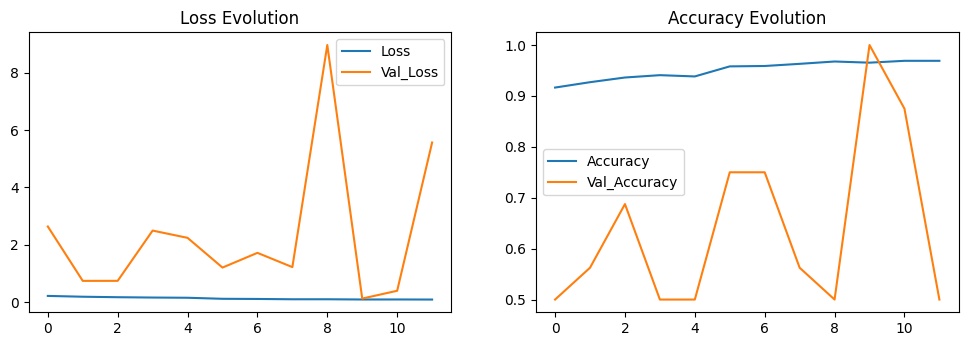

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [11]:
loss, accuracy = model.evaluate(x_test,y_test)

print("Loss of the model is - ", loss)
print("Accuracy of the model is - ", accuracy * 100, "%")

20/20 [==============================] - 30s 1s/step - loss: 0.5571 - accuracy: 0.8590
Loss of the model is -  0.5571215152740479
Accuracy of the model is -  85.89743375778198 %


In [13]:
model.save("../data/models/model.h5")